Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from  sklearn.preprocessing import LabelEncoder

In [2]:
company=pd.read_csv("E:\DATA SCIENCE\LMS\ASSIGNMENT\MY ASSIGNMENT\Decision Tree\Company_Data.csv")
company2=company.iloc[:,0:7]
company2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,9.50,138,73,11,276,120,Bad
1,11.22,111,48,16,260,83,Good
2,10.06,113,35,10,269,80,Medium
3,7.40,117,100,4,466,97,Medium
4,4.15,141,64,3,340,128,Bad
...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good
396,6.14,139,23,3,37,120,Medium
397,7.41,162,26,12,368,159,Medium
398,5.94,100,79,7,284,95,Bad


In [3]:
labelenocer=LabelEncoder()
(company2['ShelveLoc'])=labelenocer.fit_transform(company2['ShelveLoc'])

In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
company2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,9.50,138,73,11,276,120,0
1,11.22,111,48,16,260,83,1
2,10.06,113,35,10,269,80,2
3,7.40,117,100,4,466,97,2
4,4.15,141,64,3,340,128,0
...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1
396,6.14,139,23,3,37,120,2
397,7.41,162,26,12,368,159,2
398,5.94,100,79,7,284,95,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(company2.iloc[:,0:6])
df_norm.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price
390,0.336202,0.316327,0.545455,0.310345,0.102204,0.520958
391,0.374923,0.775510,0.424242,0.000000,0.078156,0.598802
392,0.278427,0.530612,0.212121,0.448276,0.611222,0.634731
393,0.342348,0.326531,0.303030,0.344828,0.032064,0.574850
394,0.328826,0.540816,0.373737,0.655172,0.713427,0.688623
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150
399,0.596804,0.581633,0.161616,0.000000,0.034068,0.574850


In [8]:
company5=company2.iloc[:,6]
company5

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [9]:
company3=pd.concat([df_norm,company5],axis=1)
company3

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,1
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,2
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,2
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0
...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,1
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,2
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,2
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0


In [10]:
x5=company3.iloc[:,0:6]
y5=company3.iloc[:,6]

In [11]:
x5

,Sales,CompPrice,Income,Advertising,Population,Price
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754
...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150


In [12]:
y5

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

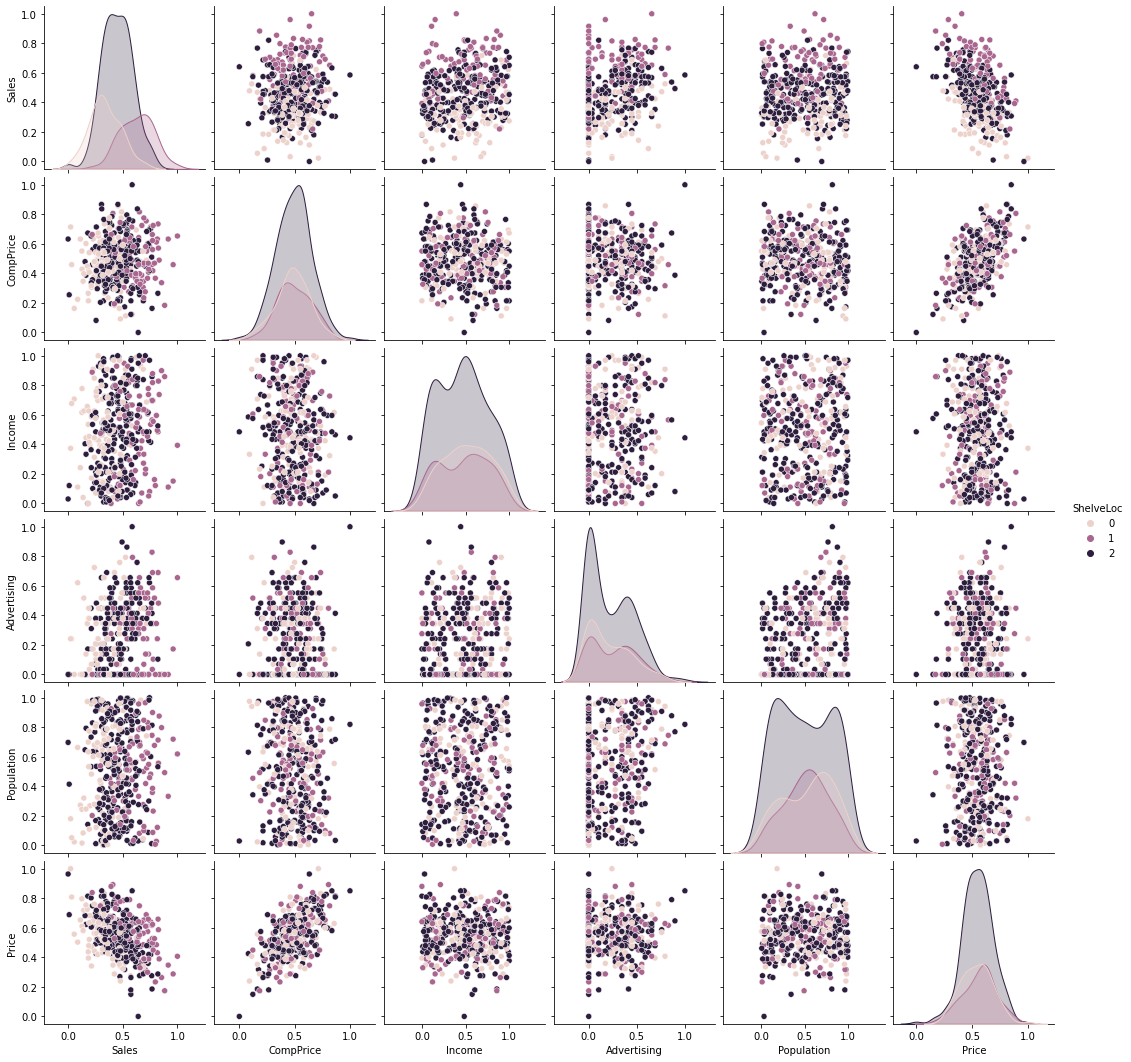

In [13]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=company3, hue = 'ShelveLoc')

In [68]:
# Splitting data into train & test
X5train, X5test, y5train, y5test = train_test_split(x5,y5, test_size=0.2, random_state=0)

In [69]:
model5=DecisionTreeClassifier(criterion ='entropy',max_depth=3)

In [77]:
model5.fit(X5train,y5train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [78]:
preds5=model5.predict(X5test)

In [79]:
np.mean(preds5==y5test)*100

58.75

In [80]:
print(classification_report(preds5,y5test))

              precision    recall  f1-score   support

           0       0.28      0.38      0.32        13
           1       0.52      0.73      0.61        15
           2       0.76      0.60      0.67        52

    accuracy                           0.59        80
   macro avg       0.52      0.57      0.53        80
weighted avg       0.63      0.59      0.60        80



In [20]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [81]:
Kfold =    KFold(n_splits=10)
model3 =   RandomForestClassifier(n_estimators=100,max_features=3)
results=   cross_val_score(model5,x5,y5,cv=Kfold)
print(results.mean()*100)

61.5


# 1.Bagged Decision Tree for Classifie

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [82]:
# 100 parallel model thats why n_estimators=100
Kfold =    KFold(n_splits=10)
cart  =    DecisionTreeClassifier()
model6 =    BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=7)
results=   cross_val_score(model6,x5,y5,cv=Kfold)
print(results.mean()*100)

65.0


# 2.XGB Classifier

In [54]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [83]:
#fit model to training data because we already did train test splitt above
model7 = XGBClassifier()
model7.fit(X5train,y5train)

C:\Users\anku\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [84]:
# get score
result = model7.score(X5test,y5test)
result*100

61.25000000000001

# Q-2 Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [22]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [23]:
df = pd.read_csv("E:\DATA SCIENCE\LMS\ASSIGNMENT\MY ASSIGNMENT\Decision Tree\Fraud_check.csv")

In [24]:
#Viewing top 5 rows of dataframe
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [25]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [26]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10000,30000,99620], labels = ["Risky", "Good"])

In [27]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [28]:
df1=pd.get_dummies(df)
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,TaxInc_Risky,TaxInc_Good
0,68833,50047,10,1,0,0,0,1,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1,0,1
2,36925,160205,30,1,0,0,1,0,0,1,0,1
3,50190,193264,15,0,1,0,0,1,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0,1
596,69967,55369,2,0,1,1,0,0,0,1,0,1
597,47334,154058,0,1,0,1,0,0,0,1,0,1
598,98592,180083,17,0,1,0,1,0,1,0,0,1


In [29]:
df1.drop(df1.columns[[3,5,8,10]],axis=1,inplace=True)

In [30]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


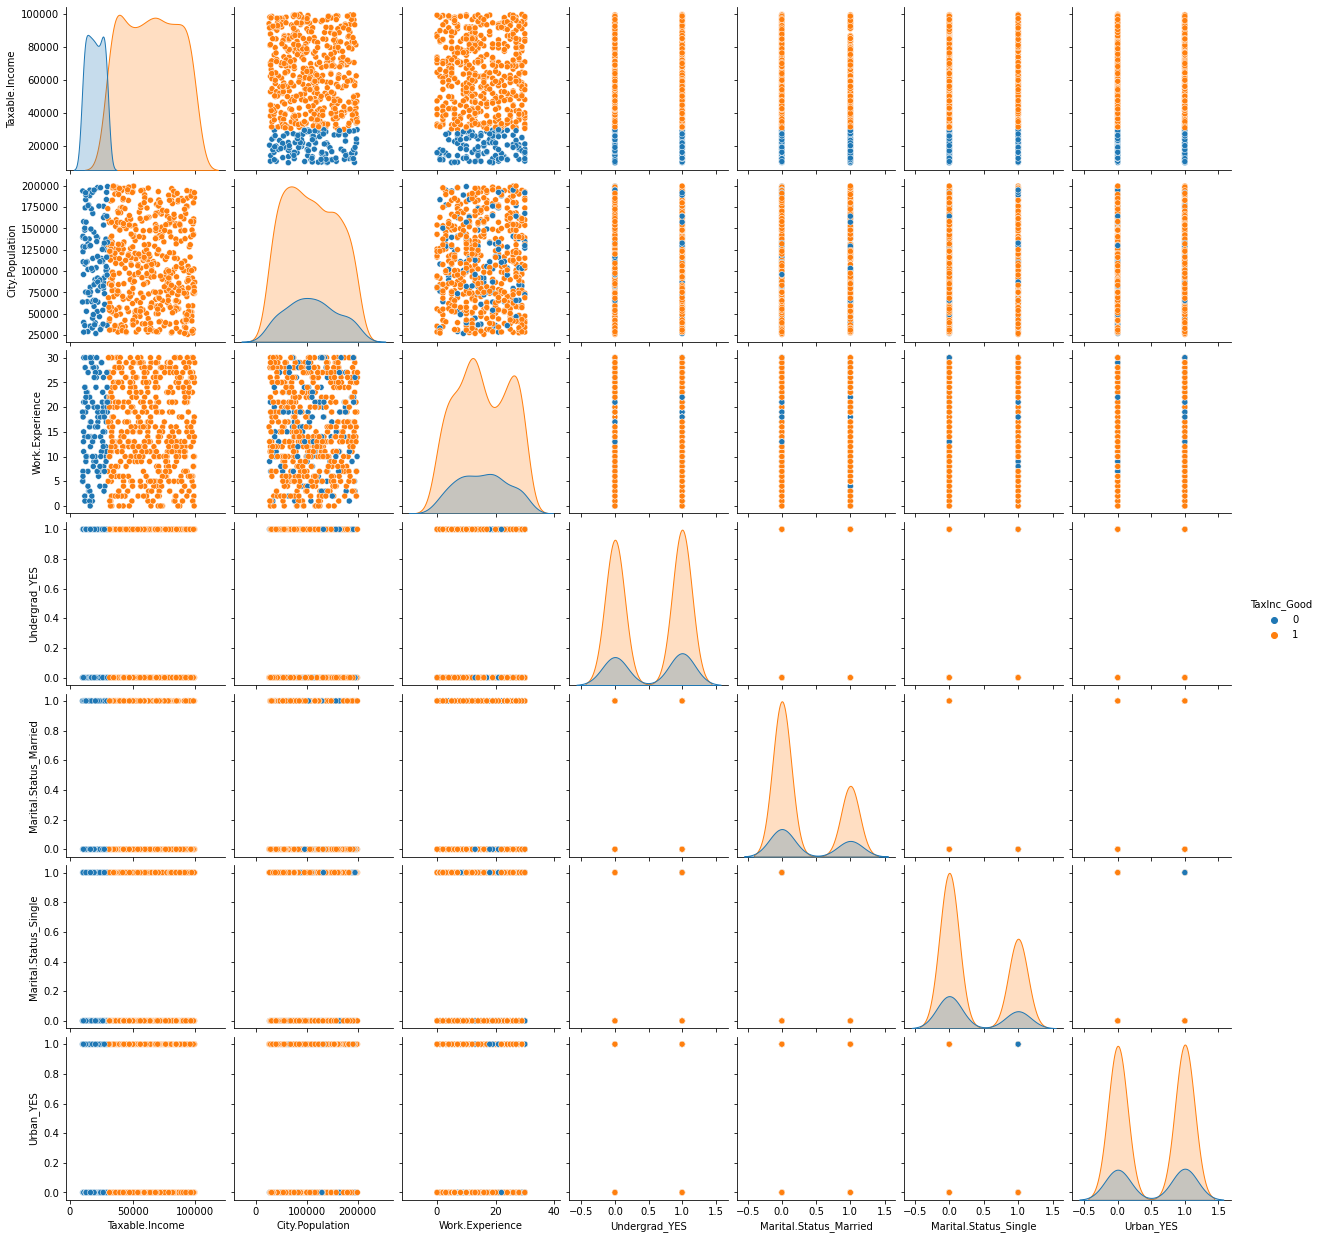

In [31]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df1, hue = 'TaxInc_Good')

In [32]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [33]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df1.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [34]:
X1 = df_norm.drop(['TaxInc_Good'], axis=1)
y1 = df_norm['TaxInc_Good']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X1

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [37]:
y1

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [85]:
# Splitting data into train & test
X1train, X1test, y1train, y1test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [86]:
model6=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model6.fit(X1train,y1train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [88]:
preds6=model6.predict(X1test)

In [89]:
pd.Series(preds6).value_counts

<bound method IndexOpsMixin.value_counts of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
115    1.0
116    1.0
117    1.0
118    1.0
119    1.0
Length: 120, dtype: float64>

In [90]:
np.mean(preds6==y1test)*100

78.33333333333333

In [91]:
print(classification_report(preds6,y1test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.99      0.79      0.88       119

    accuracy                           0.78       120
   macro avg       0.49      0.39      0.44       120
weighted avg       0.98      0.78      0.87       120



NameError: name 'model' is not defined

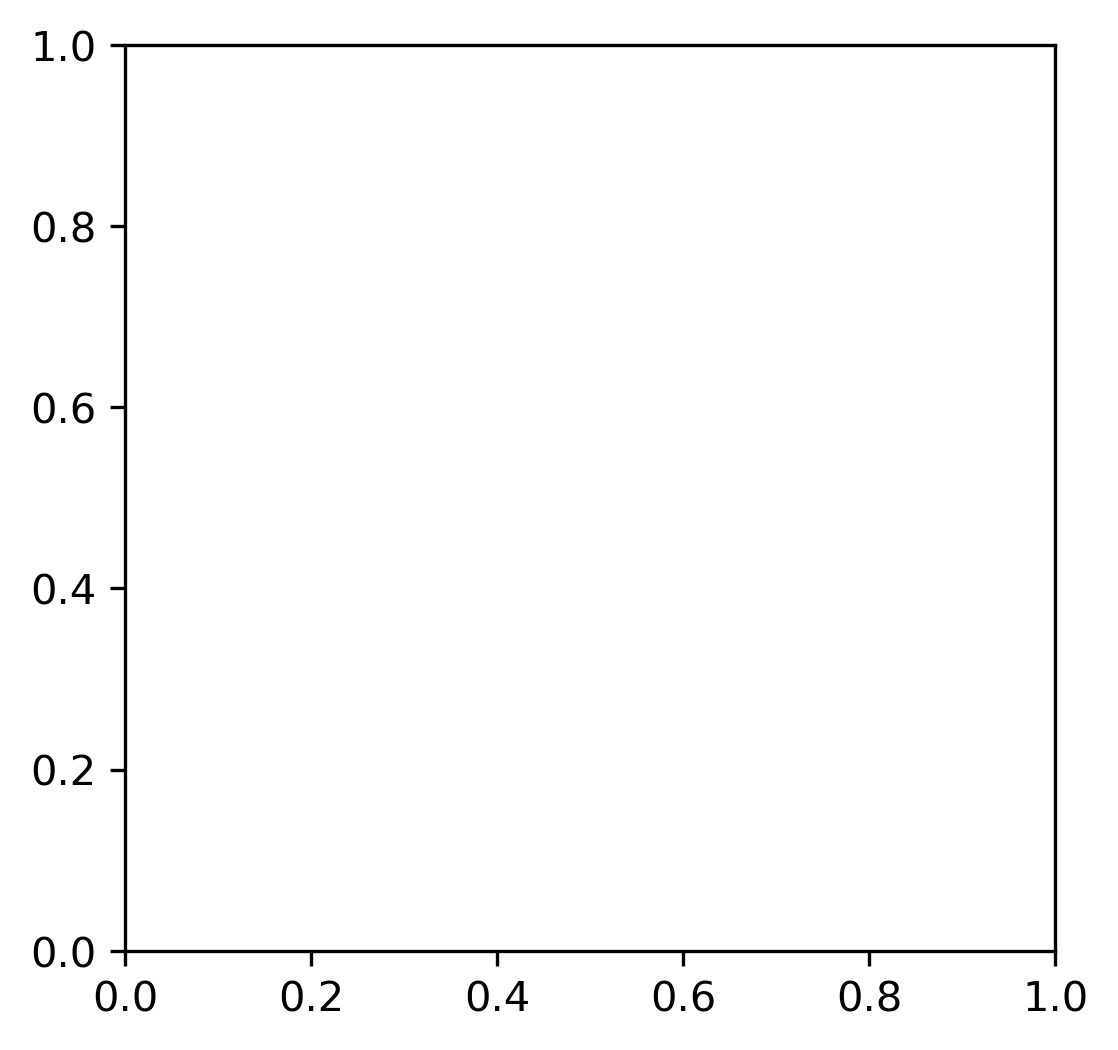

In [44]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [58]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [93]:
# number of columns of x is 9 so sqrt 9 is 3 so max_features=3
Kfold =    KFold(n_splits=10)
model3 =   RandomForestClassifier(n_estimators=100,max_features=3)
results=   cross_val_score(model3,X1,y1,cv=Kfold)
print(results.mean()*100)

73.83333333333334


# 1.Bagged Decision Tree for Classifie

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [94]:
# 100 parallel model thats why n_estimators=100
Kfold =    KFold(n_splits=10)
cart  =    DecisionTreeClassifier()
model6 =    BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=7)
results=   cross_val_score(model6,X1,y1,cv=Kfold)
print(results.mean()*100)

72.66666666666666


# 2.XGB Classifier

In [95]:
#fit model to training data because we already did train test splitt above
model8 = XGBClassifier()
model8.fit(X1train,y1train)

C:\Users\anku\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
#fit model to training data because we already did train test splitt above
model9 = XGBClassifier()
model9.fit(X1train,y1train)

[06:21:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
# get score
result = model9.score(X1test,y1test)
result*100

73.33333333333333